In [ ]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Parameters
cities = ['Delhi', 'Lucknow', 'Mumbai', 'Kolkata', 'Chennai', 'Bangalore']
train_types = ['Express', 'Superfast', 'Rajdhani', 'Shatabdi']
train_classes = ['Sleeper', 'AC 3 Tier', 'AC 2 Tier', 'AC 1 Tier', 'AC Chair Car', 'Executive', 'Second Class']
fares = ['One-way', 'Round-trip', 'Tatkal']

# Function to calculate route complexity
def get_route_complexity(origin, destination):
    route_distances = {
        ('Delhi', 'Lucknow'): 500, ('Delhi', 'Mumbai'): 1400, ('Delhi', 'Kolkata'): 1500,
        ('Delhi', 'Chennai'): 2200, ('Delhi', 'Bangalore'): 2100, ('Lucknow', 'Mumbai'): 1300,
        ('Lucknow', 'Kolkata'): 1100, ('Lucknow', 'Chennai'): 1900, ('Lucknow', 'Bangalore'): 1800,
        ('Mumbai', 'Kolkata'): 1900, ('Mumbai', 'Chennai'): 1300, ('Mumbai', 'Bangalore'): 980,
        ('Kolkata', 'Chennai'): 1700, ('Kolkata', 'Bangalore'): 2000, ('Chennai', 'Bangalore'): 350
    }
    return route_distances.get((origin, destination), random.randint(500, 2200))

# Function to check if a date is a weekend or holiday
def is_holiday(start_date):
    return start_date.weekday() >= 5  # Saturday (5) and Sunday (6)

# Function to categorize the time of day
def get_time_of_day(start_date):
    hour = start_date.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Generate synthetic data
n_samples = 150000
data = []

for _ in range(n_samples):
    origin = random.choice(cities)
    destination = random.choice([city for city in cities if city != origin])
    start_date = datetime.now() + timedelta(days=random.randint(0, 30))
    end_date = start_date + timedelta(hours=random.randint(3, 24))
    train_type = random.choice(train_types)
    train_class = random.choice(train_classes)
    fare = random.choice(fares)
    base_price = round(random.uniform(500, 2000), 2)

    # Calculate Tatkal markup and price
    if fare == "Tatkal":
        tatkal_markup = {
            "Sleeper": random.uniform(100, 200),
            "AC Chair Car": random.uniform(125, 225),
            "AC 3 Tier": random.uniform(300, 400),
            "AC 2 Tier": random.uniform(400, 500),
            "AC 1 Tier": random.uniform(400, 500),
            "Executive": random.uniform(400, 500),
            "Second Class": random.uniform(10, 15)
        }.get(train_class, 0)
    else:
        tatkal_markup = 0

    price = base_price + tatkal_markup

    # Calculate ticket confirmation probability
    if fare == "Tatkal":
        is_confirmed = random.choices([0, 1], weights=[80, 20])[0]  # 20% chance of confirmation for Tatkal
    else:
        is_confirmed = random.choices([0, 1], weights=[20, 80])[0]  # 80% chance for regular tickets

    # Add derived columns
    days_to_departure = (start_date - datetime.now()).days
    duration_hours = (end_date - start_date).seconds // 3600
    route_complexity = get_route_complexity(origin, destination)
    booking_time_slot = random.choice(['Morning', 'Afternoon', 'Evening', 'Night'])
    holiday_effect = 1 if is_holiday(start_date) else 0  # 1 for holiday/weekend, 0 otherwise
    time_of_day = get_time_of_day(start_date)

    # Simulating historical demand (for simplicity, use random values for each route)
    historical_demand = random.randint(50, 500)  # Random demand value

    data.append({
        'origin': origin,
        'destination': destination,
        'start_date': start_date,
        'end_date': end_date,
        'train_type': train_type,
        'price': round(price, 2),
        'train_class': train_class,
        'fare': fare,
        'tatkal_markup': round(tatkal_markup, 2),
        'is_confirmed': is_confirmed,
        'days_to_departure': days_to_departure,
        'duration_hours': duration_hours,
        'route_complexity': route_complexity,
        'booking_time_slot': booking_time_slot,
        'holiday_effect': holiday_effect,
        'time_of_day': time_of_day,
        'historical_demand': historical_demand
    })

# Create DataFrame
df = pd.DataFrame(data)

In [ ]:
df

,origin,destination,start_date,end_date,train_type,price,train_class,fare,tatkal_markup,is_confirmed,days_to_departure,duration_hours,route_complexity,booking_time_slot,holiday_effect,time_of_day,historical_demand
0,Kolkata,Bangalore,2024-12-16 07:24:42.488195,2024-12-16 21:24:42.488195,Shatabdi,684.21,Second Class,Tatkal,11.28,0,1,14,2000,Evening,0,Morning,301
1,Lucknow,Mumbai,2025-01-07 07:24:42.488310,2025-01-08 00:24:42.488310,Superfast,904.58,AC 2 Tier,Round-trip,0.00,1,23,17,1300,Night,0,Morning,443
2,Delhi,Kolkata,2024-12-27 07:24:42.488358,2024-12-27 11:24:42.488358,Superfast,793.25,Sleeper,Round-trip,0.00,0,12,4,1500,Morning,0,Morning,362
3,Kolkata,Lucknow,2024-12-27 07:24:42.488397,2024-12-27 16:24:42.488397,Rajdhani,1286.03,AC Chair Car,Tatkal,131.83,0,12,9,1689,Evening,0,Morning,339
4,Lucknow,Chennai,2024-12-15 07:24:42.488436,2024-12-15 23:24:42.488436,Superfast,1976.94,AC Chair Car,One-way,0.00,1,0,16,1900,Afternoon,1,Morning,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,Chennai,Mumbai,2024-12-24 07:24:46.875761,2024-12-24 23:24:46.875761,Shatabdi,1172.86,Executive,One-way,0.00,1,9,16,742,Afternoon,0,Morning,389
149996,Lucknow,Bangalore,2024-12-24 07:24:46.875779,2024-12-24 23:24:46.875779,Rajdhani,1553.21,Executive,One-way,0.00,1,9,16,1800,Morning,0,Morning,416
149997,Delhi,Kolkata,2025-01-03 07:24:46.875796,2025-01-03 12:24:46.875796,Shatabdi,1685.15,Executive,One-way,0.00,1,19,5,1500,Morning,0,Morning,260
149998,Lucknow,Kolkata,2024-12-17 07:24:46.875814,2024-12-17 14:24:46.875814,Shatabdi,1933.29,AC Chair Car,One-way,0.00,1,2,7,1100,Night,0,Morning,305


In [ ]:
df['is_confirmed'].value_counts()

,count
is_confirmed,
1,89846
0,60154


In [ ]:
#df.to_csv('synthetic_tatkal_data.csv', index=False)

In [ ]:
# Filter tatkal and normal tickets
tatkal_tickets = df[df['fare'] == 'Tatkal']
normal_tickets = df[df['fare'] != 'Tatkal']

# Calculate average price
avg_price_tatkal = tatkal_tickets['price'].mean()
avg_price_normal = normal_tickets['price'].mean()

# Calculate percentage increase
percentage_increase = ((avg_price_tatkal - avg_price_normal) / avg_price_normal) * 100

print(f"Average Price of Tatkal Tickets: {avg_price_tatkal:.2f}")
print(f"Average Price of Normal Tickets: {avg_price_normal:.2f}")
print(f"Percentage Increase in Tatkal Ticket Price: {percentage_increase:.2f}%")



Average Price of Tatkal Tickets: 1543.37
Average Price of Normal Tickets: 1250.57
Percentage Increase in Tatkal Ticket Price: 23.41%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# --- TASK 1: Predicting Ticket Prices (Regression) --- #

# Preprocessing for Regression Problem
df_encoded = pd.get_dummies(df, columns=['origin', 'destination', 'train_type', 'train_class', 'fare', 'time_of_day', 'booking_time_slot'])
X_price = df_encoded.drop(['price', 'start_date', 'end_date', 'is_confirmed'], axis=1)
y_price = df['price']

# Split the data
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Train a Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train_price, y_train_price)

# Predict and evaluate
y_pred_price = regressor.predict(X_test_price)
mae = mean_absolute_error(y_test_price, y_pred_price)
mse = mean_squared_error(y_test_price, y_pred_price)
r2 = r2_score(y_test_price, y_pred_price)
print(f"Price Prediction - MAE: {mae}, MSE: {mse}, R²: {r2}")


Price Prediction - MAE: 374.4796893411459, MSE: 187251.41853645068, R²: 0.12952863919673463


In [ ]:
# 3. Predicting Ticket Confirmation
# Split data for confirmation prediction
X_confirm = data.drop(columns=['price', 'is_confirmed'])
y_confirm = data['is_confirmed']
X_train_confirm, X_test_confirm, y_train_confirm, y_test_confirm = train_test_split(X_confirm, y_confirm, test_size=0.2, random_state=42)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_confirm, y_train_confirm)

# Evaluate the model
y_pred_confirm = log_reg.predict(X_test_confirm)
accuracy = accuracy_score(y_test_confirm, y_pred_confirm)
precision = precision_score(y_test_confirm, y_pred_confirm)
recall = recall_score(y_test_confirm, y_pred_confirm)
f1 = f1_score(y_test_confirm, y_pred_confirm)

print("Confirmation Prediction Metrics:")
print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")


Confirmation Prediction Metrics:
Accuracy: 0.8004333333333333, Precision: 0.7983016983016983, Recall: 0.8913055602030003, F1: 0.8422439461410767


In [ ]:
# 4. Analyzing Impact of Tatkal Markup on Price
# Train Multiple Linear Regression Model
X_markup = data[['tatkal_markup']]
y_markup = data['price']
lin_reg_markup = LinearRegression()
lin_reg_markup.fit(X_markup, y_markup)

# Examine Coefficients
print("Tatkal Markup Coefficient:")
print(f"Coefficient: {lin_reg_markup.coef_[0]}, Intercept: {lin_reg_markup.intercept_}")


Tatkal Markup Coefficient:
Coefficient: 1.0028007435863677, Intercept: 1250.5774857562074


In [ ]:
# # 5. Classification of Train Types
# # Encode target variable
# le = LabelEncoder()
# data['train_type_encoded'] = le.fit_transform(df['train_type'])

# X_type = data.drop(columns=['price', 'is_confirmed', 'train_type_encoded'])
# y_type = data['train_type_encoded']
# X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X_type, y_type, test_size=0.2, random_state=42)

# # Train Logistic Regression Model
# log_reg_type = LogisticRegression()
# log_reg_type.fit(X_train_type, y_train_type)

# # Evaluate the model
# y_pred_type = log_reg_type.predict(X_test_type)
# accuracy_type = accuracy_score(y_test_type, y_pred_type)
# f1_type = f1_score(y_test_type, y_pred_type, average='weighted')

# print("Train Type Classification Metrics:")
# print(f"Accuracy: {accuracy_type}, F1: {f1_type}")

In [ ]:
# 6. Time-Based Predictions
# Train Logistic Regression Model for time-based predictions
X_time = data[['days_to_departure', 'tatkal_markup', 'price']]
y_time = data['is_confirmed']
X_train_time, X_test_time, y_train_time, y_test_time = train_test_split(X_time, y_time, test_size=0.2, random_state=42)

log_reg_time = LogisticRegression()
log_reg_time.fit(X_train_time, y_train_time)

# Evaluate the model
y_pred_time = log_reg_time.predict(X_test_time)
accuracy_time = accuracy_score(y_test_time, y_pred_time)

print("Time-Based Prediction Metrics:")
print(f"Accuracy: {accuracy_time}")

Time-Based Prediction Metrics:
Accuracy: 0.7474


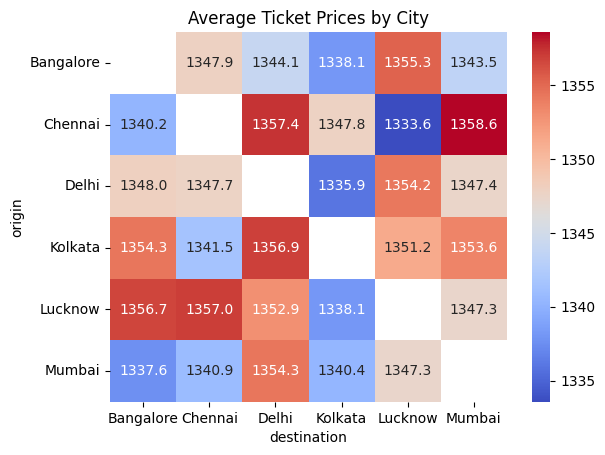

In [ ]:
# 7. Visual Analytics Dashboard
# Price Heatmap
price_heatmap = df.pivot_table(index='origin', columns='destination', values='price', aggfunc='mean')
sns.heatmap(price_heatmap, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Average Ticket Prices by City")
plt.show()


# Tatkal Markup Boxplot
fig = px.box(df, x='train_class', y='tatkal_markup', title='Tatkal Markup Distribution by Train Class')
fig.show()